In [1]:
import midynet
from midynet.utility import display
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pathlib
import numpy as np
import fractions


display.setup_dir("./")

paths_to_figures = [".", "../../../../papers/p-midynet/paper1-mutual_info/figures"]
paths_to_figures = list(map(pathlib.Path, paths_to_figures))

path_to_data = pathlib.Path(f"/home/charles_murphy/Documents/ulaval/doctorat/projects/data/midynet-data/duality/figure7/")

path_to_data.exists()

True

## Loading data from experiment

In [4]:


exp = {}
bit_ratio = np.log(2)
hg, hx, mi = {}, {}, {}
hg_past, hx_past, mi_past = {}, {}, {}

all_dynamics = ["glauber", "sis", "cowan"]
for dynamics in all_dynamics:
    name = f"exact-{dynamics}"
    if (path_to_data / name / "config.pickle").exists():
        exp[dynamics] = midynet.Experiment.load_from_file(path_to_data / name / "config.pickle")
        data = exp[dynamics].metrics["recon_information"].data[exp[dynamics].name]
        hg[dynamics] = midynet.Statistics(data, name="prior")
        hx[dynamics] = midynet.Statistics(data, name="evidence")
        mi[dynamics] = midynet.Statistics(data, name="mutualinfo")
        
        hg_past[dynamics] = midynet.Statistics(data, name="posterior_past")
        hx_past[dynamics] = midynet.Statistics(data, name="evidence_past")
        mi_past[dynamics] = midynet.Statistics(data, name="mutualinfo_past")
        

xlabel = r"Number of time steps"
titles = {"glauber": r"Glauber", "sis": r"SIS", "cowan": r"Cowan"}
coupling_labels = {"glauber": r"J", "sis": r"\lambda", "cowan": r"\nu"}
coupling_names = {"glauber": "coupling", "sis": r"infection_prob", "cowan": r"nu"}

## Figure 7

In [14]:
exp["glauber"].config.data_model

DataModelConfig(name=`glauber`): 
|	length = [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 23, 24, 26, 28, 30, 32, 35, 37, 40, 43, 46, 49, 53, 57, 61, 65, 70, 75, 81, 86, 93, 100, 107, 114, 123, 132, 141, 151, 162, 174, 187, 200, 215, 231, 247, 265, 284, 305, 327, 351, 376, 403, 432, 464, 497, 533, 572, 613, 657, 705, 756, 811, 869, 932, 1000, 1072, 1149, 1232, 1321, 1417, 1519, 1629, 1747, 1873, 2009, 2154, 2310, 2477, 2656, 2848, 3053, 3274, 3511, 3764, 4037, 4328, 4641, 4977, 5336, 5722, 6135, 6579, 7054, 7564, 8111, 8697, 9326, 10000]
|	coupling = [0.25, 0.5, 1]
|	past_length = [-5, 0, 0.5]
|	initial_burn = 0
|	auto_activation_prob = 0
|	auto_deactivation_prob = 0
|	num_active = -1
end

/home/charles_murphy/Documents/ulaval/doctorat/projects/codes/midynet/midynet/statistics.py:115: RuntimeWarning: invalid value encountered in true_divide
  data["mid"] /= other.__data__["mid"]
/home/charles_murphy/Documents/ulaval/doctorat/projects/codes/midynet/midynet/statistics.py:115: RuntimeWarning: invalid value encountered in true_divide
  data["mid"] /= other.__data__["mid"]
/home/charles_murphy/Documents/ulaval/doctorat/projects/codes/midynet/midynet/statistics.py:115: RuntimeWarning: invalid value encountered in true_divide
  data["mid"] /= other.__data__["mid"]


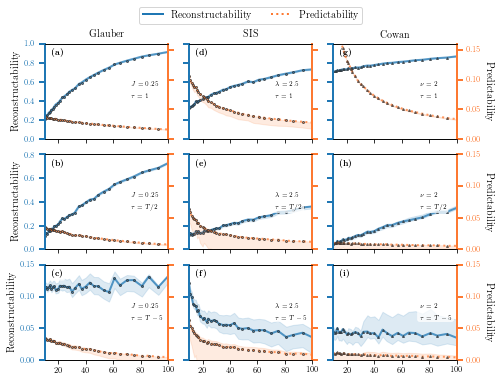

In [100]:
fig, ax = plt.subplots(3, 3, figsize=(7, 5), sharex=True, sharey=False)

ax = {dynamics: ax[:, i] for i, dynamics in enumerate(all_dynamics)}
axx = {dynamics: [_ax.twinx() for _ax in ax[dynamics]] for i, dynamics in enumerate(all_dynamics)}
# for dynamics in all_dynamics:
#     for i, _ax in enumerate(ax[dynamics]):
#         _ax.get_shared_y_axes().join(_ax, axx[dynamics][i])
    


recon_color = display.med_colors["blue"]
pred_color = display.dark_colors["orange"]


spacing = 7
min_index = 5
# recon_yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
# pred_yticks = [0, 0.05, 0.1, 0.15, 0.2]
recon_max = [1, 0.8, 0.15]
pred_max = [0.16, 0.15, 0.15]
coupling_choice = dict(glauber=0, sis=0, cowan=2)

markers = ["o", "s", "^", "*"]
for dynamics_id, dynamics in enumerate(all_dynamics):
    if dynamics not in exp:
        continue
    x = np.array(exp[dynamics].config.data_model.length)
    x = x[x<=100]
    m_indices = list(range(min_index)) + list(range(min_index, len(x), spacing))
    coupling = exp[dynamics].config.data_model.get_value(coupling_names[dynamics])
    if dynamics == "sis":
        coupling = [c / exp[dynamics].config.data_model.recovery_prob for c in coupling]
    alpha = np.linspace(0, 1, len(coupling) + 2)[2:] ** 1.5
    recon = (mi[dynamics] - mi_past[dynamics]) / (hg_past[dynamics])
    pred = (mi[dynamics] - mi_past[dynamics]) / (hx[dynamics] - hx_past[dynamics])
    tau = [0, 0.5, -5]
    tau_index = [1, 2, 0]
    for c_index, (c, a) in reversed(list(enumerate(zip(coupling, alpha)))):
        if c_index != coupling_choice[dynamics]:
            continue
        for i, (t_index, t) in enumerate(zip(tau_index, tau)):
            y = recon if len(coupling) == 1 else recon[:len(x), c_index, t_index]
            display.plot_statistics(
                x, y,
                ax=ax[dynamics][i], 
                color=recon_color,
                alpha=0.75,
                linestyle="-",
                marker=markers[c_index],
                linewidth=2,
                markersize=2,
                markeredgecolor=display.dark_colors["grey"],
                bar=False,
            )


            y = pred if len(coupling) == 1 else pred[:, c_index, t_index]
            display.plot_statistics(
                x, y,
                ax=axx[dynamics][i], 
                color=pred_color,
                alpha=0.75,
                linestyle="dotted",
                linewidth=2,
                marker=markers[c_index],
                markeredgecolor=display.dark_colors["grey"],
                markersize=2,
                bar=False,
            )
            ax[dynamics][i].set_xlim([min(x), max(x)])
            ax[dynamics][i].set_ylim([0, recon_max[i]])
            axx[dynamics][i].set_ylim([0, pred_max[i]])
            
#             ax[dynamics][i].set_xscale("log")
#             axx[dynamics][i].set_xscale("log")
#             ax[dynamics][i].set_xticks([10, 100])
#             ax[dynamics][i].set_xticklabels([10, 100])

            if dynamics_id == 0:
                ax[dynamics][i].set_ylabel(r"Reconstructability", fontsize=display.fontsizes["large"])
            else:
                ax[dynamics][i].set_yticklabels([])
            ax[dynamics][i].tick_params(axis='both', labelsize=display.fontsizes["medium"])

            if dynamics_id == len(all_dynamics)-1:
                axx[dynamics][i].set_ylabel(r"Predictability", fontsize=display.fontsizes["large"], rotation=-90, rotation_mode="anchor", va="bottom")
            else:
                axx[dynamics][i].set_yticklabels([])
            axx[dynamics][i].tick_params(axis='both', labelsize=display.fontsizes["medium"])
            tau_label = t
            if isinstance(t, int) or isinstance(t, float) and t.is_integer():
                
                if t > 0:
                    tau_label = f"{int(t)}"
                elif t == 0:
                    tau_label = f"1"
                else:
                    tau_label = f"T - {abs(int(t))}"
            elif isinstance(t, float) and t>0 and t<1:
                frac = fractions.Fraction(t)
                tau_label = f"T / {frac.denominator}"
                if frac.numerator != 1:
                    tau_label = f"{frac.numerator}" + tau_label
            else:
                raise ValueError()
            
            ax[dynamics][i].text(
                0.7, 0.55,
                rf"\noindent${coupling_labels[dynamics]} = {c}$\\$\tau = {tau_label}$",
                color="k",
                transform=ax[dynamics][i].transAxes,
                fontsize=display.fontsizes["small"],
                bbox=dict(boxstyle="round", color="white", alpha=0.75)
            )
            ax[dynamics][i].tick_params(axis='y', colors=recon_color, length=6, width=2)
            axx[dynamics][i].spines['left'].set_color(recon_color)
            axx[dynamics][i].spines['left'].set_linewidth(2)
            axx[dynamics][i].spines['right'].set_color(pred_color)
            axx[dynamics][i].spines['right'].set_linewidth(2)
            axx[dynamics][i].tick_params(axis='y', colors=pred_color, length=6, width=2)
            display.Label.plot(ax[dynamics][i], loc="top left", fontsize=display.fontsizes["medium"], box=True)
    ax[dynamics][0].set_title(titles[dynamics], fontsize=display.fontsizes["large"])
display.Label.clear()

handles = [Line2D([0], [0], marker="None", linestyle="-", color=recon_color, label=r"Reconstructability", alpha=1, lw=2, ms=2)]
handles += [Line2D([0], [0], marker="None", linestyle="dotted", color=pred_color, label=r"Predictability", alpha=1, lw=2, ms=2)]
lg = fig.legend(handles=handles, loc="center", fontsize=display.fontsizes["large"], ncol=2, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()

for p in paths_to_figures:
    fig.savefig(p / "svg/p1-figure7.svg", bbox_extra_artists=(lg,), bbox_inches='tight')
    fig.savefig(p / "pdf/p1-figure7.pdf", bbox_extra_artists=(lg,), bbox_inches='tight')
    fig.savefig(p / "png/p1-figure7.png", bbox_extra_artists=(lg,), bbox_inches='tight')